## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

2022-08-05 09:54:28.139258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 09:54:28.139301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__
# keras.__version__

'2.9.1'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print('GPU Name:')
    !nvidia-smi -L

Num GPUs Available:  0


2022-08-05 09:54:49.002770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-05 09:54:49.012293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 09:54:49.012385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-05 09:54:49.012432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-05 09:54:49.012475: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [40]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

## Daten importieren

In [20]:
fashion_mnist = keras.datasets.fashion_mnist

Bilder sind keine 1D arrays of size 784 aber 28x28 array

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [22]:
X_train_full.shape

(60000, 28, 28)

In [23]:
X_train_full.dtype

dtype('uint8')

## Aufteilung in Train/Test und Validation Set

In [24]:
val_sample_size = 5000

In [25]:
# Aufteilung in train und validation set und Normalisierung (0-1) von typ float

X_valid, X_train = X_train_full[:val_sample_size]/ 255.0, X_train_full[val_sample_size:] / 255.0 
y_valid, y_train = y_train_full[:val_sample_size], y_train_full[val_sample_size:]

X_test  = X_test/ 255.0

#Durch 255 Teilen um Farbwerte zwischen 0-1 zu skalieren

In [26]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

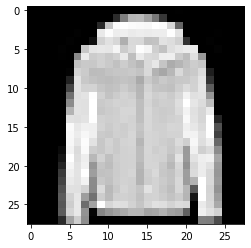

In [28]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [29]:
X_train[0].shape

(28, 28)

## Model with Sequential API

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Konvertiert jedes Bild in ein 1D-Array
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # 10 Output Neuronen --> 1 für jede Klasse, softmax activation da Klassen exklusiv sind

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"]) #learning rate by default = 0.01

Falls Trainingsset deutlich besser als Testset performt  --- Overfitting Gefahr

In [34]:
dense_epochs = 30

In [35]:
history = model.fit(X_train,y_train, epochs=dense_epochs, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7201 - accuracy: 0.7626 - val_loss: 0.5249 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4908 - accuracy: 0.8286 - val_loss: 0.4490 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4457 - accuracy: 0.8434 - val_loss: 0.4197 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8528 - val_loss: 0.3965 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3971 - accuracy: 0.8610 - val_loss: 0.3800 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3829 - accuracy: 0.8647 - val_loss: 0.3834 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3682 - accuracy: 0.8701 - val_loss: 0.3730 - val_accuracy:

## Loss plotten

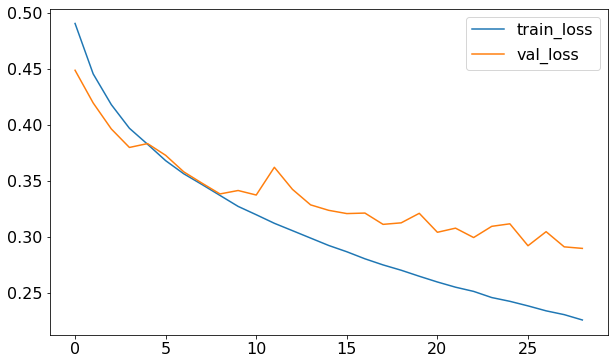

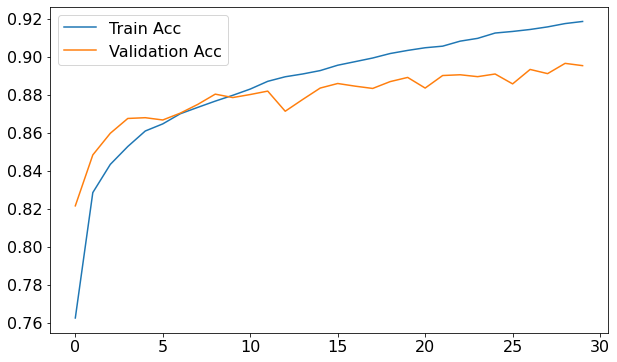

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(dense_epochs-1), y=history.history['loss'][1:], label='train_loss')
sns.lineplot(x=range(dense_epochs-1), y=history.history['val_loss'][1:], label='val_loss')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(dense_epochs), y=history.history['accuracy'], label='Train Acc')
sns.lineplot(x=range(dense_epochs), y=history.history['val_accuracy'], label='Validation Acc')
plt.show()

Hyperparameter-Tuning: 1. Learning rate verändern. 2. Anderen Optimizer 3. Anzahl Layer 4. Anzahl Neuronen per Layer 5. Activation function der Hidden-Layer

## Evaluierung

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8876


[0.32672032713890076, 0.8876000046730042]

## Predict-Methode

In [78]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [76]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

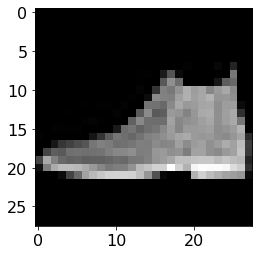

In [73]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

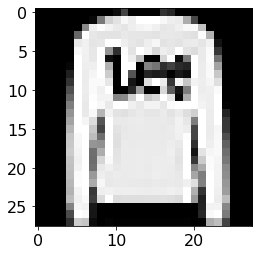

In [74]:
plt.imshow(X_test[1],cmap='gray')
plt.show()

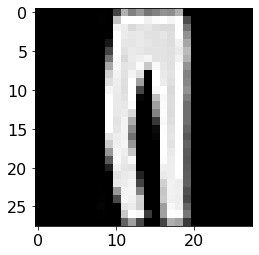

In [43]:
plt.imshow(X_test[2],cmap='gray')
plt.show()

In [44]:
y_proba = model.predict(X_test[0:3]) #Klassifizieren der Wahrscheinlichkeit für die ersten 3 Bilder im Testset
y_proba.round(2)

1/1 [==============================] - 0s 71ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
y_pred = y_proba.round().astype(int)

In [66]:
y_pred_bool = y_pred.astype(bool)

In [84]:
classes = np.array(class_names * 3).reshape(3, -1)[y_pred_bool]
print(classes)

['Ankle boot' 'Pullover' 'Trouser']


## fremdes Bild einlesen

In [72]:
import cv2
img = cv2.imread('../Bilder/Hose_test.jpg',3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img = cv2.resize(img,(28,28))

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img2 = cv2.bitwise_not(img)

In [ ]:
plt.imshow(img2,cmap='gray')
plt.show()

In [ ]:
test_pic = np.array(img2).reshape((1,28,28))

In [ ]:
y_pred = model.predict_classes(test_pic)
y_pred

In [ ]:
np.array(class_names)[y_pred]

## CNN - Convolutional Neural Network

In [99]:
model = keras.models.Sequential([
    keras.Input(shape=[28,28,1]),
    keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2), #each spatial dimension will be divided by factor 2
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu", padding="same"), #common practice to double the number of filters after each pooling layer
    keras.layers.Conv2D(256,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), #dense layer expects 1D array but Conv-layers have 2D array
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5), #reducing overfitting
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)             

In [101]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"])

## Reshape der Daten für CNN

In [102]:
X_train = X_train.reshape((-1,28,28,1))
X_valid = X_valid.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [103]:
X_train.shape

(55000, 28, 28, 1)

In [104]:
y_train.shape

(55000,)

In [105]:
cnn_epochs = 1

In [106]:
history = model.fit(X_train,y_train, epochs=cnn_epochs, validation_data = (X_valid, y_valid))

1719/1719 [==============================] - 86s 50ms/step - loss: 1.3959 - accuracy: 0.4809 - val_loss: 0.6618 - val_accuracy: 0.7738


In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):  
    f1 = activation_model.predict(X_valid[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(X_valid[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(X_valid[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
model.save("fashion_mnist.h5")